In [5]:
%reload_ext autoreload
%autoreload 2
import tensorflow as tf
import collections
import sys
import math
import numpy as np
sys.path.append('../../pytools')
import d2l
import os

d2l.gpu_mem_init()

Memory growth enabled for PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'): True


In [8]:
num_hiddens, num_heads = 100, 5
attention = d2l.MultiHeadAttention(num_hiddens, num_hiddens, num_hiddens, num_hiddens, num_heads, 0.5)
#attention.initialize()

batch_size, num_queries, valid_lens = 2, 4, np.array([3, 2])
X = np.ones((batch_size, num_queries, num_hiddens))
attention(X, X, X, valid_lens).shape

TensorShape([2, 4, 100])

In [16]:
#@save
class PositionalEncoding(tf.keras.layers.Layer):
    """位置编码"""
    def __init__(self, num_hiddens, dropout, max_len=1000):
        super().__init__()
        self.dropout = tf.keras.layers.Dropout(dropout)
        # 创建一个足够长的P
        self.P = np.zeros((1, max_len, num_hiddens))
        X = np.arange(max_len, dtype=np.float32).reshape(
            -1,1)/np.power(10000, np.arange(
            0, num_hiddens, 2, dtype=np.float32) / num_hiddens)
        xx = np.arange(max_len, dtype=np.float32).reshape(-1,1)
        xxd = np.power(10000, np.arange(
            0, num_hiddens, 2, dtype=np.float32) / num_hiddens)
        test = xx/xxd
        print(f"xx.shape:{xx.shape}, xxd.shape:{xxd.shape}, test.shape{test.shape}")
        self.P[:, :, 0::2] = np.sin(X)
        self.P[:, :, 1::2] = np.cos(X)

    def call(self, X, **kwargs):
        X = X + self.P[:, :X.shape[1], :]
        return self.dropout(X, **kwargs)

xx.shape:(1000, 1), xxd.shape:(16,), test.shape(1000, 16)


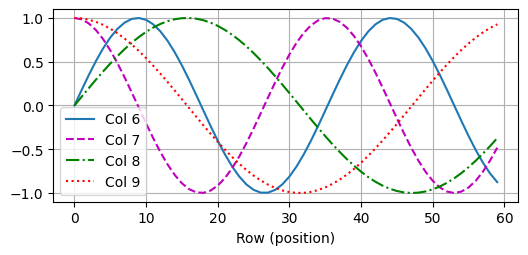

In [17]:
encoding_dim, num_steps = 32, 60
pos_encoding = PositionalEncoding(encoding_dim, 0)
X = pos_encoding(tf.zeros((1, num_steps, encoding_dim)), training=False)
P = pos_encoding.P[:, :X.shape[1], :]
d2l.plot(np.arange(num_steps), P[0, :, 6:10].T, xlabel='Row (position)',
         figsize=(6, 2.5), legend=["Col %d" % d for d in np.arange(6, 10)])